# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [1]:
import cv2
import numpy as np

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from scikit-image (`skimage`).

In [2]:
import skimage.data

In [3]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [4]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

In [5]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

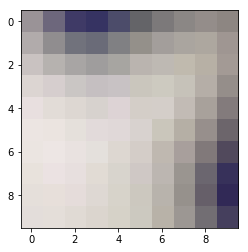

In [7]:
plt.imshow(image[0:10,0:10])

We can do many things with images, such as make them grayscale:

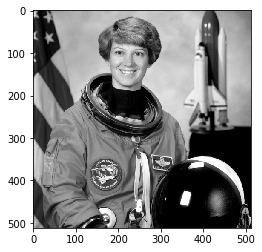

In [8]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [9]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

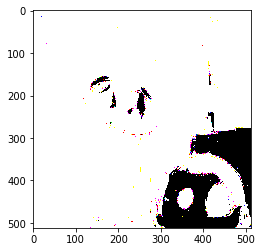

In [10]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

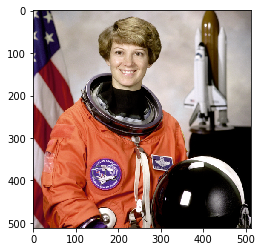

In [11]:
plt.imshow(image.astype(np.float32) / 255.)

Now it looks the same as before.

We can also flip images in different directions:

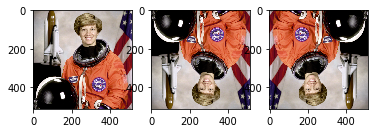

In [12]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

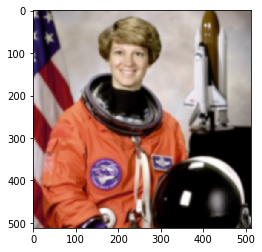

In [13]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

<img src="http://thuglifememe.com/wp-content/uploads/2017/08/22-you-got-this-meme-9.jpg"/>

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter**

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

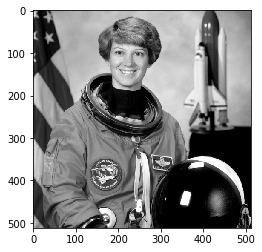

In [27]:
# TODO: your code here
image2=skimage.data.astronaut()
image3=cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
plt.imshow(image3,cmap="gray")


dtype('float32')

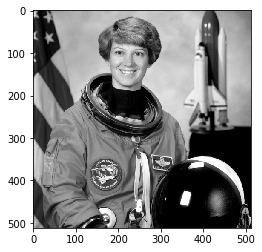

In [29]:
image4=image3.astype(np.float32)
plt.imshow(image4/255.0,cmap='gray')
image4.dtype

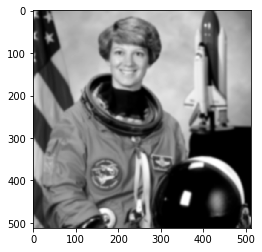

In [30]:
image5=cv2.GaussianBlur(image4.copy(), ksize=(11,11), sigmaX=-1)
plt.imshow(image5,cmap='gray')

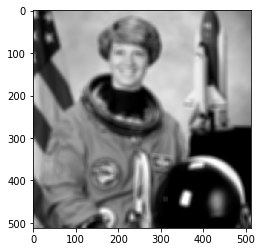

In [31]:
image6=cv2.boxFilter(image4.copy(),ddepth=-1,ksize=(11,11))
plt.imshow(image6,cmap="gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c28352850>,
 <matplotlib.colorbar.Colorbar at 0x1c2bbeebd0>)

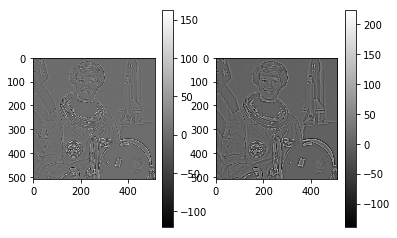

In [37]:
plt.subplot(1,2,1),plt.imshow(image4.copy()-image5,cmap="gray"),plt.colorbar()
plt.subplot(1,2,2),plt.imshow(image4.copy()-image6,cmap="gray"),plt.colorbar()


##### Modifying kernel size to 15,15 and 19,19 below makes the edges more clear/defined

(<matplotlib.axes._subplots.AxesSubplot at 0x1c2bb8bb90>,
 <matplotlib.colorbar.Colorbar at 0x1c2c4c6f10>)

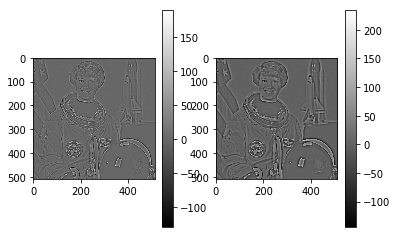

In [40]:
image7=cv2.boxFilter(image4.copy(),ddepth=-1,ksize=(15,15))
image8=cv2.GaussianBlur(image4.copy(), ksize=(15,15), sigmaX=-1)
plt.subplot(1,2,1),plt.imshow(image4.copy()-image8,cmap="gray"),plt.colorbar(),plt.title("Image minus Gaussian Blur")
plt.subplot(1,2,2),plt.imshow(image4.copy()-image7,cmap="gray"),plt.colorbar(),plt.title("Image minus Box Filter")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c2d6ecf10>,
 Text(0.5,1,'Image minus Box Filter'))

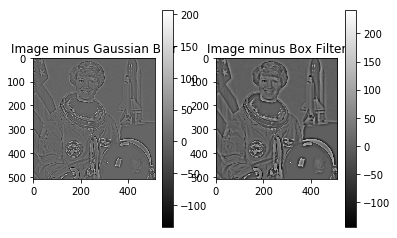

In [51]:
image9=cv2.boxFilter(image4.copy(),ddepth=-1,ksize=(20,20))
image10=cv2.GaussianBlur(image4.copy(), ksize=(19,19), sigmaX=-1)
plt.subplot(1,2,1),plt.imshow(image4.copy()-image10,cmap="gray"),plt.colorbar(),plt.title("Image minus Gaussian Blur")
plt.subplot(1,2,2),plt.imshow(image4.copy()-image9,cmap="gray"),plt.colorbar(),plt.title("Image minus Box Filter")

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (`cv2.cvtColor`)

3) Display the H, S and V components, side-by-side

(<matplotlib.image.AxesImage at 0x1c2d3abb50>,
 Text(0.5,1,'HSV'),
 <matplotlib.colorbar.Colorbar at 0x1c2d377c90>)

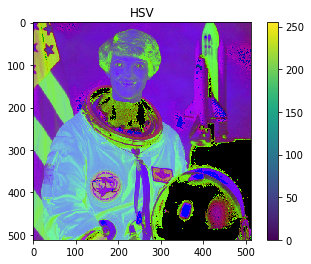

In [52]:
# TODO: your code here
image22=skimage.data.astronaut()
image23=cv2.cvtColor(image22, cv2.COLOR_BGR2HSV)
plt.imshow(image23),plt.title("HSV"),plt.colorbar()

Text(0.5,1,'Value')

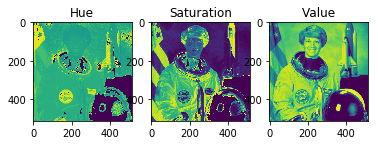

In [48]:
hue,sat,val = cv2.split(image23)
plt.subplot(1,3,1),plt.imshow(hue),plt.title("Hue")
plt.subplot(1,3,2),plt.imshow(sat),plt.title("Saturation")
plt.subplot(1,3,3),plt.imshow(val);plt.title("Value")


### 3D Projection

Consider a group of 3D points. 

We have a 100 uniformly distributed points in a volume XYZ: \[-5,5\],\[-5,5\],\[5,100\] (the units are, say, meters).

Some points are close to us (the camera at `(0,0,0)`), they have low Z values, and some are farther away.

In [16]:
pts3d = np.hstack([np.random.uniform(-5,5,(1000,2)),np.random.uniform(5,100,(1000,1))])[:,np.newaxis,:]

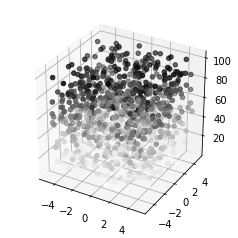

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pts3d[:,0,0],pts3d[:,0,1],pts3d[:,0,2],c=-pts3d[:,0,2],cmap='gray');
ax.set_aspect('equal');

You're given the following intrinsics matrix (`K`):

In [55]:
K = np.array([[800,0,320],[0,800,240],[0,0,1]], dtype=np.float32)
print(K)
K3=K

[[800.   0. 320.]
 [  0. 800. 240.]
 [  0.   0.   1.]]


Calculate the 2D projection of the 3D points on the image plane, and plot them (`plt.scatter`).

Try doing the calculation yourself, using matrix multiplication for the entire group, and also using `cv2.projectPoints`.

Try changing the `K` matrix focal length parameters to see how it affects the projection.

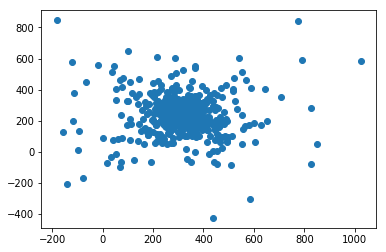

In [64]:
# TODO: your code here
pi=np.zeros((3,1),dtype=K.dtype)
K = np.append(K, pi, axis=1)
projs=[]
for poin in pts3d:
    t = np.append(poin,[1])
    t1 = np.matmul(K,t)
    projs.append(np.divide(t1, t1[2]))

plt.scatter([p[0] for p in projs], [p[1] for p in projs])

### Changing Focal Length in the Intrinsic Matrix

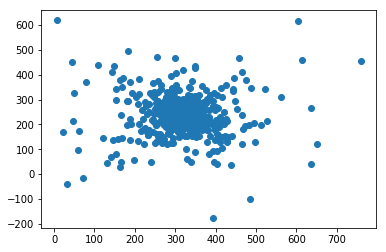

In [54]:
K2 = np.array([[500,0,320],[0,500,240],[0,0,1]], dtype=np.float32)
pi=np.zeros((3,1),dtype=K2.dtype)
K2 = np.append(K2, pi, axis=1)
projs2=[]
for poin in pts3d:
    t = np.append(poin,[1])
    t2 = np.matmul(K2,t)
    projs2.append(np.divide(t2, t2[2]))

plt.scatter([p[0] for p in projs2], [p[1] for p in projs2])

### Using Projectpoints

(1000, 1, 2)


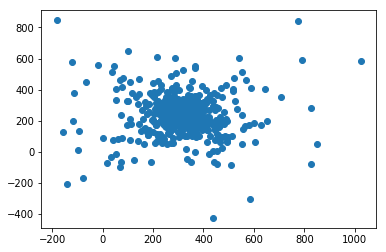

In [56]:
img,j=cv2.projectPoints(pts3d, np.zeros((1,3),np.float32), np.zeros((1,3),np.float32),K3 , None)
print img.shape


plt.scatter([p[0][0] for p in img], [p[0][1] for p in img])

Consider a 3D cube:

In [61]:
# cube veritces
Z = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z[:,2] += 10 # translate on Z
Z[:,0] += 2  # translate on X

# list of faces
faces = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]], 
         [Z[0],Z[1],Z[5],Z[4]], 
         [Z[2],Z[3],Z[7],Z[6]], 
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

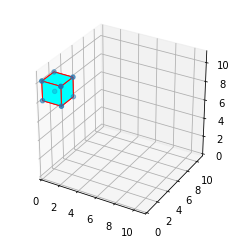

In [62]:
# Plot the cube in 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11)
ax.set_aspect('equal') # uniform scale axes

Use the same method from before to project the 3D points to 2D

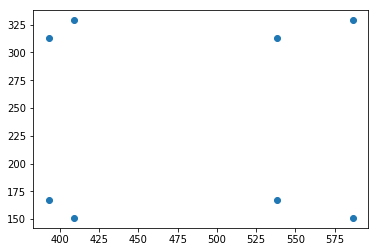

In [65]:
# TODO: your code here
pts2d = []

for poin in Z:
    t = np.append(poin,[1])
    t1 = np.matmul(K,t)
    pts2d.append([t1[0]/t1[2], t1[1]/t1[2]])

plt.scatter([p[0] for p in pts2d], [p[1] for p in pts2d])

In [66]:
# list of 2D faces
faces2d = [[pts2d[0],pts2d[1],pts2d[2],pts2d[3]],
           [pts2d[4],pts2d[5],pts2d[6],pts2d[7]], 
           [pts2d[0],pts2d[1],pts2d[5],pts2d[4]], 
           [pts2d[2],pts2d[3],pts2d[7],pts2d[6]], 
           [pts2d[1],pts2d[2],pts2d[6],pts2d[5]],
           [pts2d[4],pts2d[7],pts2d[3],pts2d[0]]]

Now we can plot the cube projected on our 2D image:

(0, 480)

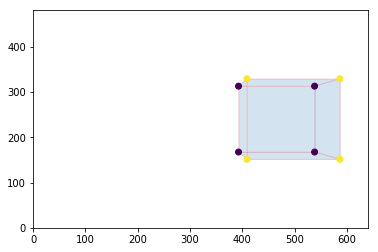

In [68]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter([p[0] for p in pts2d], [p[1] for p in pts2d],c=-Z[:,2])
ax.set_xlim(0,640)
ax.set_ylim(0,480)

Try to change the translation of the 3D points, as well as the K matrix, and see how it affects the 2D projection.

In [74]:
# cube veritces
Z2 = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z2[:,2] += 2 # translate on Z
Z2[:,0] += 8# translate on X


# list of faces
faces = [[Z2[0],Z2[1],Z2[2],Z2[3]],
         [Z2[4],Z2[5],Z2[6],Z2[7]], 
         [Z2[0],Z2[1],Z2[5],Z2[4]], 
         [Z2[2],Z2[3],Z2[7],Z2[6]], 
         [Z2[1],Z2[2],Z2[6],Z2[5]],
         [Z2[4],Z2[7],Z2[3],Z2[0]]]

K4 = np.array([[500,0,320],[0,500,240],[0,0,1]], dtype=np.float32)

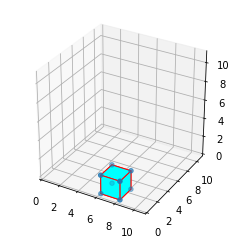

In [75]:
# Plot the cube in 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z2[:,0], Z2[:,1], Z2[:,2])
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11)
ax.set_aspect('equal') # uniform scale axes

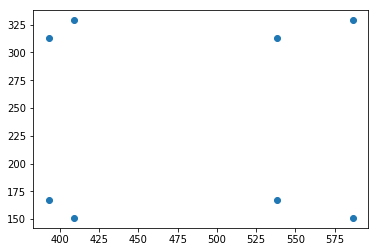

In [77]:
pts2d2 = []
pi=np.zeros((3,1),dtype=K4.dtype)
K4 = np.append(K4, pi, axis=1)
for poin in Z2:
    t = np.append(poin,[1])
    t1 = np.matmul(K4,t)
    pts2d2.append([t1[0]/t1[2], t1[1]/t1[2]])

plt.scatter([p[0] for p in pts2d], [p[1] for p in pts2d])

In [79]:
faces2d2 = [[pts2d2[0],pts2d2[1],pts2d2[2],pts2d2[3]],
           [pts2d2[4],pts2d2[5],pts2d2[6],pts2d2[7]], 
           [pts2d2[0],pts2d2[1],pts2d2[5],pts2d2[4]], 
           [pts2d2[2],pts2d2[3],pts2d2[7],pts2d2[6]], 
           [pts2d2[1],pts2d2[2],pts2d2[6],pts2d2[5]],
           [pts2d2[4],pts2d2[7],pts2d2[3],pts2d2[0]]]

(0, 1000)

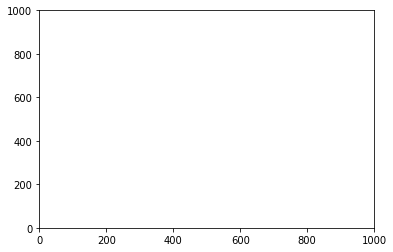

In [82]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d2):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter([p[0] for p in pts2d2], [p[1] for p in pts2d2],c=-Z2[:,2])
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)